In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from tensorflow.keras import datasets, layers, models

In [3]:
path = "data/"
print(os.listdir("data/"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


# load data

In [32]:
df_train = pd.read_csv(path + "train.csv", parse_dates = ['datetime'],
                         index_col='datetime', infer_datetime_format=True)
df_test = pd.read_csv(path + 'test.csv', parse_dates = ['datetime'],
                        index_col='datetime', infer_datetime_format=True)
df_submission = pd.read_csv(path+'sampleSubmission.csv', parse_dates = ['datetime'],
                        index_col='datetime', infer_datetime_format=True)

# Columns 

- datetime : 시간별 날짜
- season :  
  1.(1분기)  
  2.(2분기)   
  3.(3분기)  
  4.(4분기)
- holiday : 하루가 휴일로 간주되는지 여부
- workingday : 주말과 휴일이 아닌 일하는 날
- weather :   
  1.(맑음, 구름, 조금, 흐림)  
  2.(안개+흐림, 안개+구름, 안개+구름이 거의 없음 + 흐림)  
  3.(가벼운 눈, 가벼운 비 + 천둥 + 구름, 가벼운 비 + 구름)  
  4.(폭우 + 우박 + 천둥 + 안개, 눈 + 안개)
- temp : 섭씨 온도
- atemp : 섭씨 온도의 느낌
- humidity : 상대 습도
- windspeed : 풍속
- casual : 미등록 사용자 대여수
- registered : 등록된 사용자 대여수
- count : 대여수

 

In [33]:
df_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [34]:
df_test.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [35]:
df_submission.head(3)

,count
datetime,
2011-01-20 00:00:00,0
2011-01-20 01:00:00,0
2011-01-20 02:00:00,0


# EDA

## 데이터 타입 확인

In [36]:
print(df_train.shape, df_test.shape)
print("훈련 데이터")
print(df_train.dtypes)
print("테스트 데이터")
print(df_test.dtypes)

(10886, 11) (6493, 8)
훈련 데이터
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
테스트 데이터
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object


## 결측치 확인

In [27]:
print(train_data.isnull().sum())

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64
count    0
dtype: int64


In [42]:
print(test_data.isnull().sum())

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [43]:
print(samp_subm.isnull().sum())

count    0
dtype: int64


## datetime 에서 년,월,일,시간,분,초를 추출해 column 추가

In [47]:
df_train['year'] = df_train.index.year

In [48]:
df_train['year'] = df_train.index.year
df_train['month'] = df_train.index.month
df_train['day'] = df_train.index.day
df_train['hour'] = df_train.index.hour
df_train['minute'] = df_train.index.minute
df_train['second'] = df_train.index.second

In [50]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 연도별, 월별,시간별에 따른 대여량 평균치 분석

In [57]:
def bar_plot(df, x, ax):
    fig = plt.figure(figsize=(5,3))
    sns.barplot(data=df, x=x, y="count", palette="Blues_d", ax=ax)

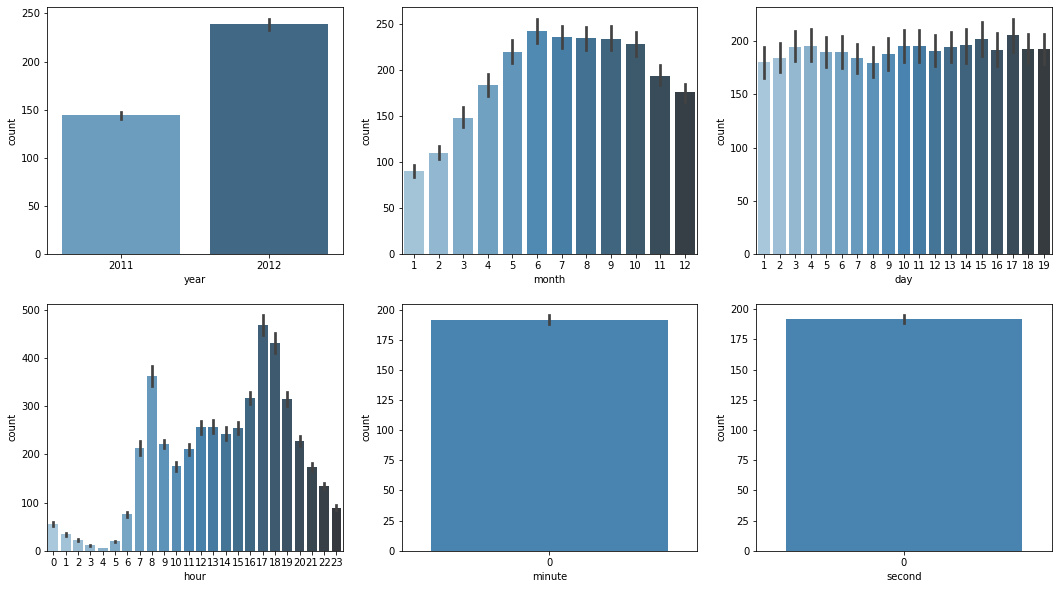

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

In [59]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 10)

bar_plot(df_train, "year", ax=ax1)
bar_plot(df_train, "month", ax=ax2)
bar_plot(df_train, "day", ax=ax3)
bar_plot(df_train, "hour", ax=ax4)
bar_plot(df_train, "minute", ax=ax5)
bar_plot(df_train, "second", ax=ax6)

## 연도별,월별,시간별에 따른 분석 결과

- 연도별 : 2011년보다 2012년 대여량이 많아짐  
- 월별 : 월별 대여량은 6월에 가장 많고, 따뜻한 계절(5~10월달)에 대여량이 많음
- 일별 : 일별 대여량은 크게 차이점이 없고, 특징점 역시 없음.
- 시간별 : 오전에는 8시에 가장 많고, 오후에는 17시~18시에 가장 많음

## datetime을 기반으로 요일 추출

In [9]:
x_train = np.array(train_data.iloc[:,:10])

In [10]:
x_train = x_train.reshape(-1,10,1)
x_train.shape

(10886, 10, 1)

In [11]:
y_train = np.array(train_data.iloc[:,10])
y_train

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [15]:
test_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014


In [16]:
test_data.shape, train_data.shape

((6493, 8), (10886, 11))

In [19]:
train_data.columns, test_data.columns

(Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'),
 Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed'],
       dtype='object'))

In [20]:
train_data["casual"]

datetime
2011-01-01 00:00:00     3
2011-01-01 01:00:00     8
2011-01-01 02:00:00     5
2011-01-01 03:00:00     3
2011-01-01 04:00:00     0
                       ..
2012-12-19 19:00:00     7
2012-12-19 20:00:00    10
2012-12-19 21:00:00     4
2012-12-19 22:00:00    12
2012-12-19 23:00:00     4
Name: casual, Length: 10886, dtype: int64

In [14]:
x_test = np.array(test_data)
x_test = x_test.reshape(-1,10,1)
x_test.shape

ValueError: cannot reshape array of size 51944 into shape (10,1)

In [12]:
model = models.Sequential()
model.add(layers.SimpleRNN(8, input_shape = (10,1)))
model.add(layers.Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_train, y_train, epochs =50, verbose=0)

In [13]:
y_predict = model.predict(x_test)

NameError: name 'x_test' is not defined

In [ ]:
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_predict))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_predict.reshape(20,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()